In [8]:
## 정확도를 계산하는 함수
def accuracy(y_true, y_pred):
    """
    정확도 계산 함수
    param y_true : 실제값
    param y_pred : 예측값
    return : 정확도
    """
    # 옳은 예측 값을 세기 위한 카운터를 초기화 한다.
    correct_counter = 0
    # y_true와 y_pred 목록에 저장된 값들을 한 쌍씩 비교한다.
    for yt, yp in zip(y_true, y_pred):
        if yt==yp:
            # 예측 값이 타겟 값과 같으면 카운터 값을 1 증가시킨다.
            correct_counter += 1
            # 맞게 예측한 개수 / 전체 개수
        return correct_counter / len(y_true)

In [9]:
## 사이킷런의 정확도 함수 사용 가능
from sklearn import metrics
l1 = [0, 1, 1, 1, 0, 0, 0, 1]
l2 = [0, 1, 0, 1, 0, 1, 0, 0]
metrics.accuracy_score(l1, l2)

0.625

In [13]:
## TP, TN, FP, FN
def true_positive(y_true, y_pred):
    """
    TP 계산하는 함수
    param y_true : 실제 값의 목록
    param y_pred : 예측 값의 목록
    return : TP의 개수
    """
    # 초기화
    tp = 0
    for yt, yp in zip(y_true, y_pred):
        if yt == 1 and yp == 1:
            tp += 1
    return tp

def true_negative(y_true, y_pred):
    """
    TN을 계산하는 함수
    param y_true : 실제 값의 목록
    param y_pred : 예측 값의 목록
    return : TN의 개수
    """
    # 초기화
    tn = 0
    for yt, yp in zip(y_true, y_pred):
        if yt == 0 and yp == 0:
            tn += 1
    return tn

def false_positive(y_true, y_pred):
    """
    FP을 계산하는 함수
    param y_true : 실제 값의 목록
    param y_pred : 예측 값의 목록
    return : FP의 개수
    """
    # 초기화
    fp = 0
    for yt, yp in zip(y_true, y_pred):
        if yt == 0 and yp == 1:
            fp += 1
    return fp

def false_negative(y_true, y_pred):
    """
    FN을 계산하는 함수
    param y_true : 실제 값의 목록
    param y_pred : 예측 값의 목록
    return : FN의 개수
    """
    # 초기화
    fn = 0
    for yt, yp in zip(y_true, y_pred):
        if yt == 1 and yp == 0:
            fn += 1
    return fn

In [14]:
## 위 함수들 확인
l1 = [0, 1, 1, 1, 0, 0, 0, 1]
l2 = [0, 1, 0, 1, 0, 1, 0, 0]

print('TP :',true_positive(l1, l2))

print('TN :',true_negative(l1, l2))

print('FP :',false_positive(l1, l2))

print('FN :',false_negative(l1, l2))

TP : 2
TN : 3
FP : 1
FN : 2


In [15]:
## TP, TN FP, FN을 사용하여 정확도를 계산하는 함수
def acc(y_true, y_pred):
    tp = true_positive(y_true, y_pred)
    fp = false_positive(y_true, y_pred)
    fn = false_negative(y_true, y_pred)
    tn = true_negative(y_true, y_pred)
    acc_score = (tp+tn) / (tp+tn+fp+fn)
    return acc_score

In [18]:
l1 = [0, 1, 1, 1, 0, 0, 0, 1]
l2 = [0, 1, 0, 1, 0, 1, 0, 0]

print(metrics.accuracy_score(l1, l2))
print(acc(l1, l2))

0.625
0.625


In [19]:
## 정밀도 구현 코드
def precision(y_true, y_pred):
    tp = true_positive(y_true, y_pred)
    fp = false_positive(y_true, y_pred)
    precision = tp / (tp+fp)
    return precision

In [20]:
l1 = [0, 1, 1, 1, 0, 0, 0, 1]
l2 = [0, 1, 0, 1, 0, 1, 0, 0]
precision(l1, l2)

0.6666666666666666

In [21]:
def recall(y_true, y_pred):
    tp = true_positive(y_true, y_pred)
    fn = false_negative(y_true, y_pred)
    recall = tp / (tp+fn)
    return recall

In [22]:
l1 = [0, 1, 1, 1, 0, 0, 0, 1]
l2 = [0, 1, 0, 1, 0, 1, 0, 0]
recall(l1, l2)

0.5

In [23]:
## PR 커브
y_true = [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0]
y_pred = [0.02638412, 0.11114267, 0.31620708,
0.0490937, 0.0191491, 0.17554844,
0.15952202, 0.03819563, 0.11639273,
0.079377, 0.08584789, 0.39095342,
0.27259048, 0.03447096, 0.04644807,
0.03543574, 0.18521942, 0.05934905,
0.61977213, 0.33056815]

In [24]:
precisions = []
recalls = []

# 정밀도와 재현율을 계산할 기준값들
thresholds = [0.0490937 , 0.05934905, 0.079377,
 0.08584789, 0.11114267, 0.11639273,
 0.15952202, 0.17554844, 0.18521942,0.27259048, 0.31620708, 0.33056815,
 0.39095342, 0.61977213]

In [26]:
# 각 기준값에 대해, 예측 범주를 계산하고 이에 대한 정밀도와 리콜을 계산하여 목록에 추가
for i in thresholds:
    temp_prediction = [1 if x >= i else 0 for x in y_pred]
    p = precision(y_true, temp_prediction)
    r = recall(y_true, temp_prediction)
    precisions.append(p)
    recalls.append(r)

Text(0, 0.5, 'Precision')

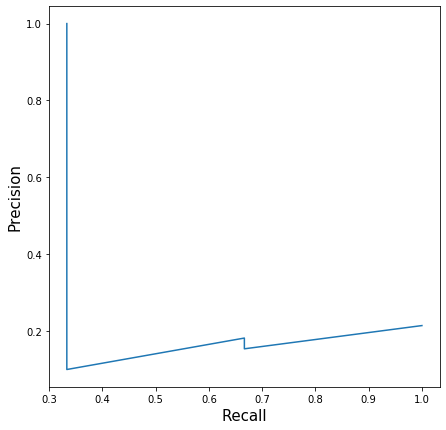

In [28]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7, 7))
plt.plot(recalls, precisions)
plt.xlabel('Recall', fontsize=15)
plt.ylabel('Precision', fontsize=15)

In [29]:
## f1 스코어
def f1(y_true, y_pred):
    p = precision(y_true, y_pred)
    r = recall(y_true, y_pred)
    
    score = 2*p*r / (p+r)
    return score

In [31]:
## 사이킷 런의 F1 스코어 함수와 비교
from sklearn import metrics
y_true = [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0]
y_pred = [0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0]

print(f1(y_true, y_pred))
print(metrics.f1_score(y_true, y_pred))

0.5714285714285715
0.5714285714285715
